# Nicht generatives Trainig mit DeepHull simple loss

In [1]:
from script.NeuralNets.Networks import ICNN, SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.NeuralNets.trainFunction import train_icnn
from script.eval import Plots_for
from script.Verification.Verification import verification

In [2]:
sequential = False
epochs = 3
batch_size = 1
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

if not sequential:
    icnn = ICNN([2, 10, 10, 1])
else:
    icnn = SequentialNN([2, 10, 10, 1])

In [3]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()

dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

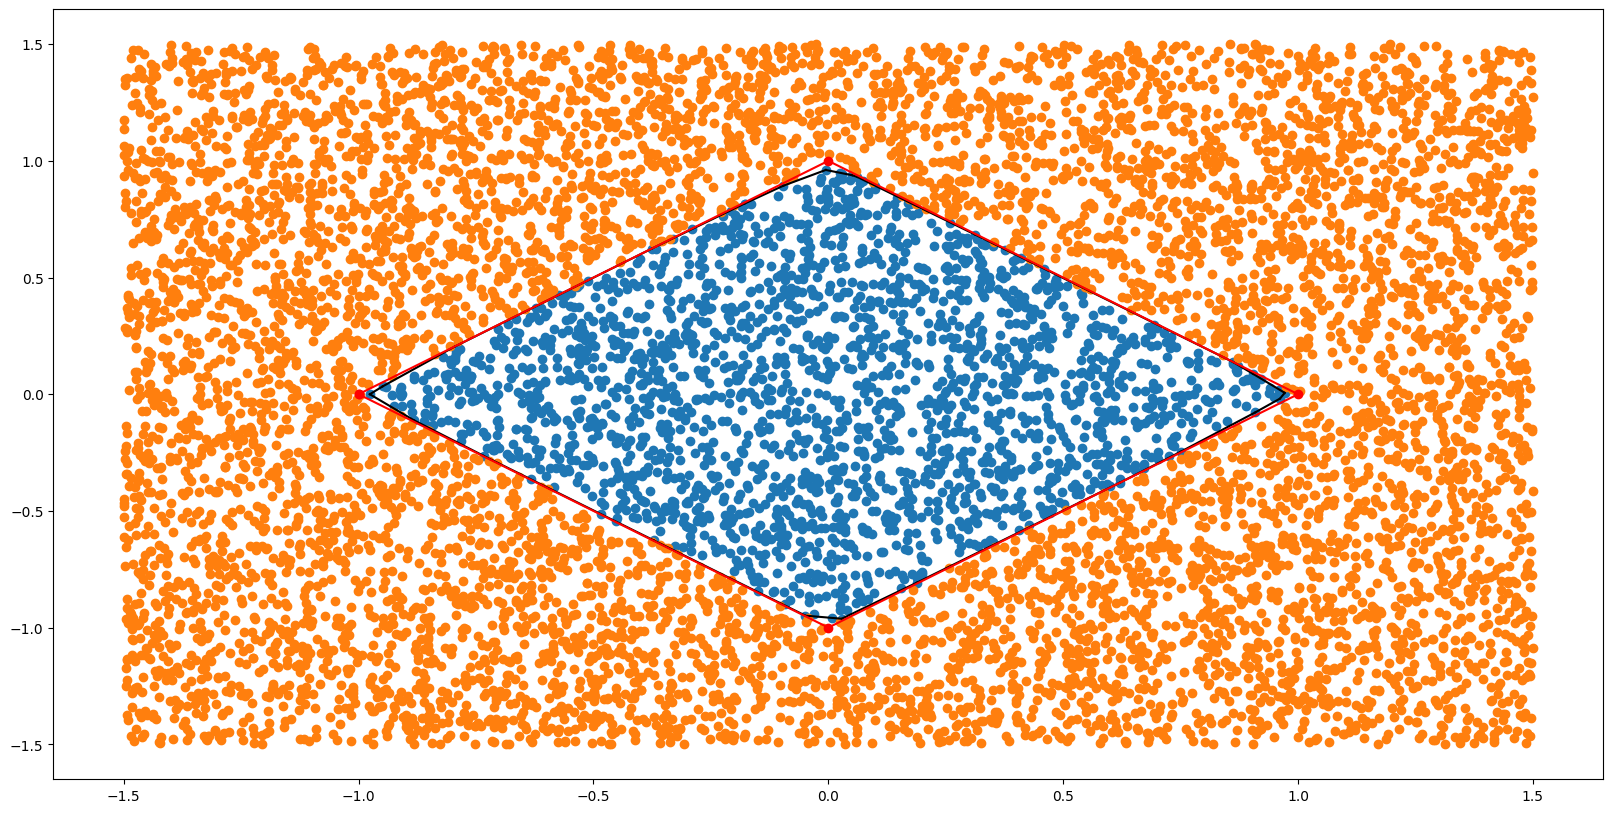

In [4]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range)
plots.plt_initial()

In [5]:
history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, sequential=sequential, hyper_lambda=hyper_lambda)

=== Epoch: 0===
batch = 0, mean loss = 1.5715154168083552
batch = 100, mean loss = 1.3278782525745692
batch = 200, mean loss = 1.3445642674978442
batch = 300, mean loss = 1.3260920269133047
batch = 400, mean loss = 1.3067472247785603
batch = 500, mean loss = 1.277201970937095
batch = 600, mean loss = 1.2501062220327726
batch = 700, mean loss = 1.2248721052536566
batch = 800, mean loss = 1.1958715832239566
batch = 900, mean loss = 1.1719429153330239
batch = 1000, mean loss = 1.150650229312235
batch = 1100, mean loss = 1.1296279937734044
batch = 1200, mean loss = 1.1040988833843302
batch = 1300, mean loss = 1.082495369536872
batch = 1400, mean loss = 1.0583491716162015
batch = 1500, mean loss = 1.0354290219637285
batch = 1600, mean loss = 1.0141857174238733
batch = 1700, mean loss = 0.9927453533985675
batch = 1800, mean loss = 0.9747995943029193
batch = 1900, mean loss = 0.9553514825142063
batch = 2000, mean loss = 0.9374579795053869
batch = 2100, mean loss = 0.9226030889055526
batch = 2

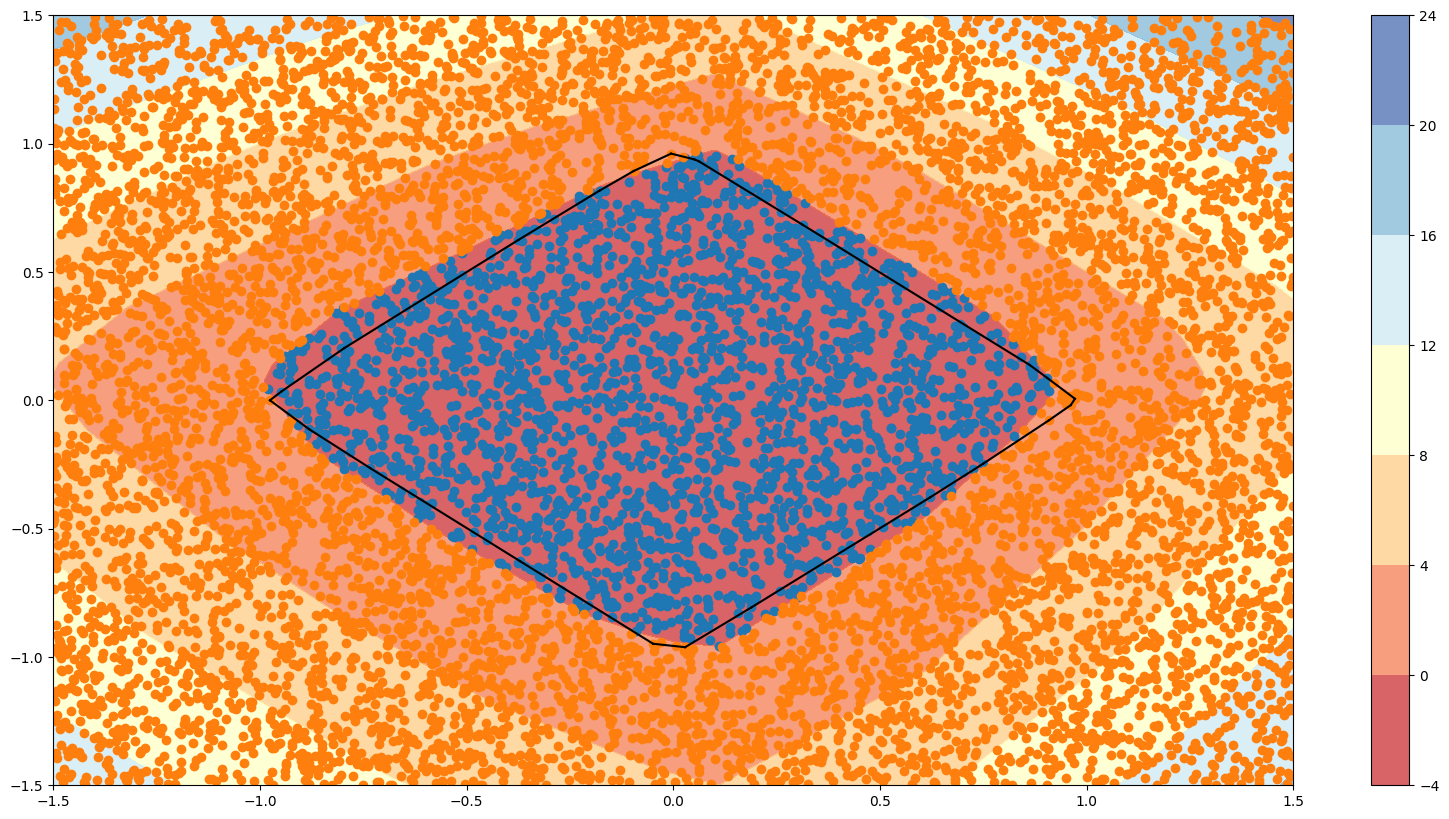

In [6]:
plots.plt_mesh()

In [7]:
A, b = Rhombus().get_A(), Rhombus().get_b()
result = verification(icnn, A_b=[A, b], sequential=sequential)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-12
optimum solution at: [1. 0.], with value [1.01687036], true output: 0


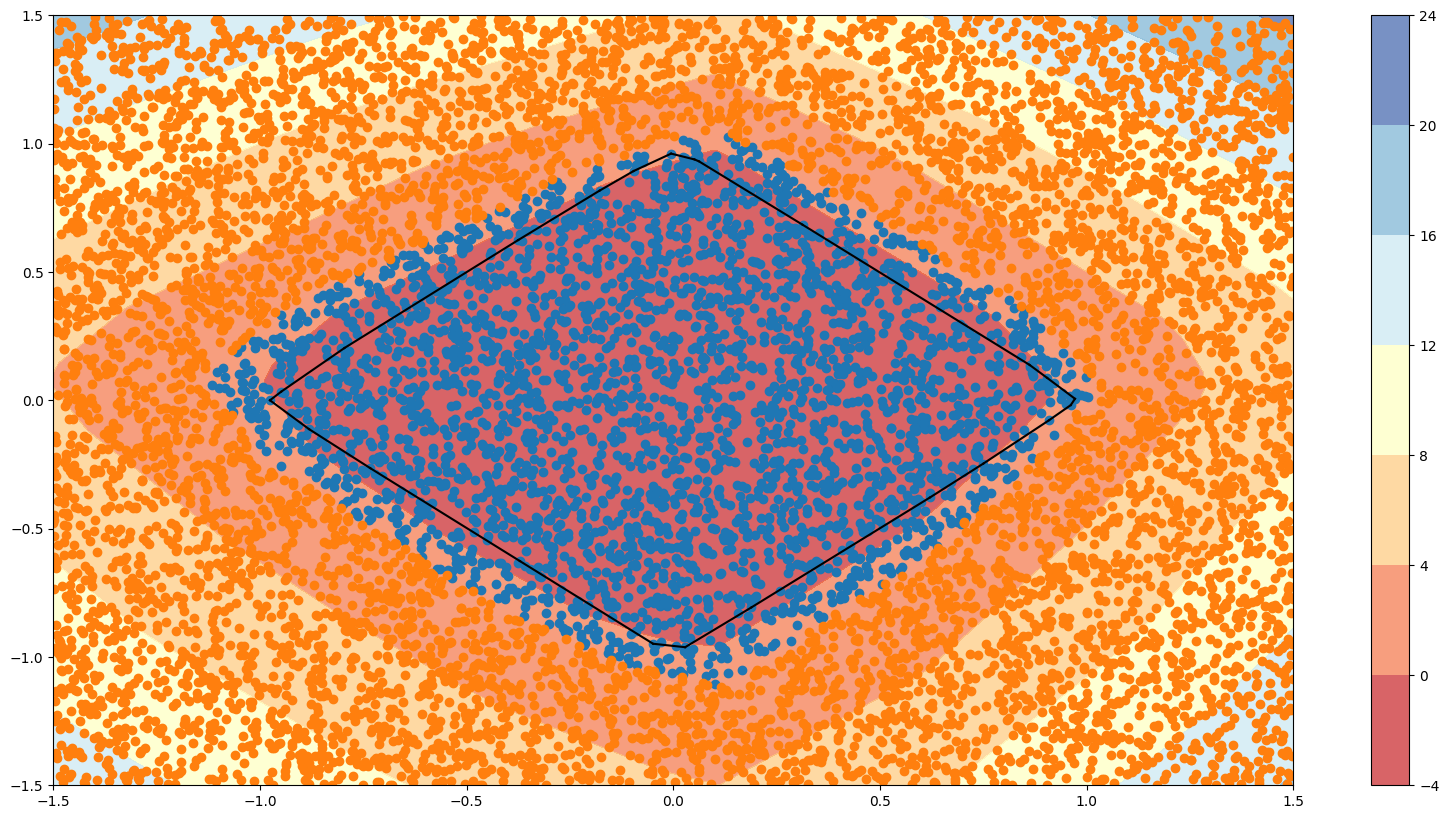

In [8]:
input_data, plots.c = result
plots.plt_mesh()